invariant mass and missing energy graphs

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import hist
import mplhep as hep

In [36]:
f=uproot.open("/home/submit/chowb/fccee/FCCAnalyzer/tmp/output_xsec_example.root")

In [37]:
f.keys()

['p8_ee_Zmumu_ecm91;1',
 'p8_ee_Zmumu_ecm91/leps_all_p;1',
 'p8_ee_Zmumu_ecm91/leps_all_theta;1',
 'p8_ee_Zmumu_ecm91/leps_all_phi;1',
 'p8_ee_Zmumu_ecm91/leps_all_q;1',
 'p8_ee_Zmumu_ecm91/leps_all_no;1',
 'p8_ee_Zmumu_ecm91/m_inv;1',
 'p8_ee_Zmumu_ecm91/emiss;1',
 'p8_ee_Zmumu_ecm91/meta;1',
 'p8_ee_Ztautau_ecm91;1',
 'p8_ee_Ztautau_ecm91/leps_all_p;1',
 'p8_ee_Ztautau_ecm91/leps_all_theta;1',
 'p8_ee_Ztautau_ecm91/leps_all_phi;1',
 'p8_ee_Ztautau_ecm91/leps_all_q;1',
 'p8_ee_Ztautau_ecm91/leps_all_no;1',
 'p8_ee_Ztautau_ecm91/m_inv;1',
 'p8_ee_Ztautau_ecm91/emiss;1',
 'p8_ee_Ztautau_ecm91/meta;1']

9200601.0


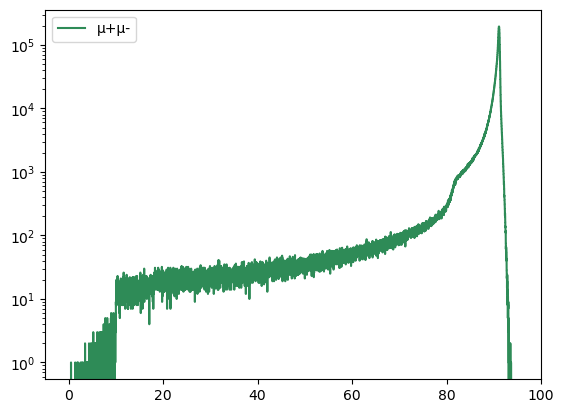

In [78]:
h = f['p8_ee_Zmumu_ecm91/m_inv;1']

y1,x = h.to_numpy()
plt.plot(x[:-1],y1, color='seagreen', drawstyle='steps-mid', label='μ+μ-')
integral = sum(y1)
print(integral)


plt.xlim(-5,100)
plt.yscale("log")
plt.legend()

247016.0


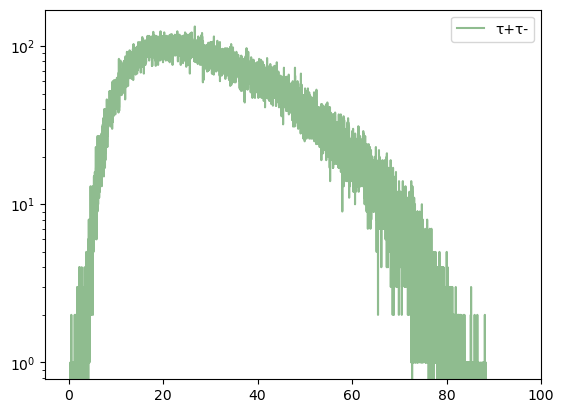

In [79]:
h = f['p8_ee_Ztautau_ecm91/m_inv;1']

y2,x = h.to_numpy()

plt.plot(x[:-1],y2, color='darkseagreen', drawstyle='steps-mid', label='τ+τ-')
integral = sum(y2)
print(integral)

plt.xlim(-5,100)
plt.yscale("log")
plt.legend()

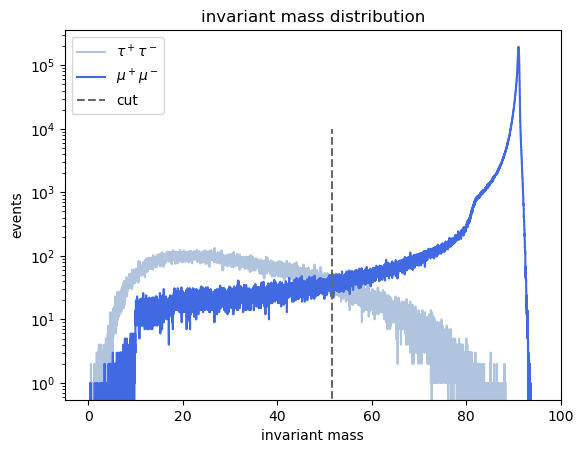

In [80]:
plt.plot(x[:-1],y2, color='lightsteelblue', drawstyle='steps-mid', label="$τ^+τ^-$")
plt.plot(x[:-1],y1, color='royalblue', drawstyle='steps-mid', label="$μ^+μ^-$")

plt.xlim(-5,100)
plt.yscale("log")
plt.plot([51.6525,51.6525],[0,1e4], color = 'dimgrey', linestyle = 'dashed', label = "cut")
plt.title("invariant mass distribution")
plt.ylabel("events")
plt.xlabel("invariant mass")
plt.legend()

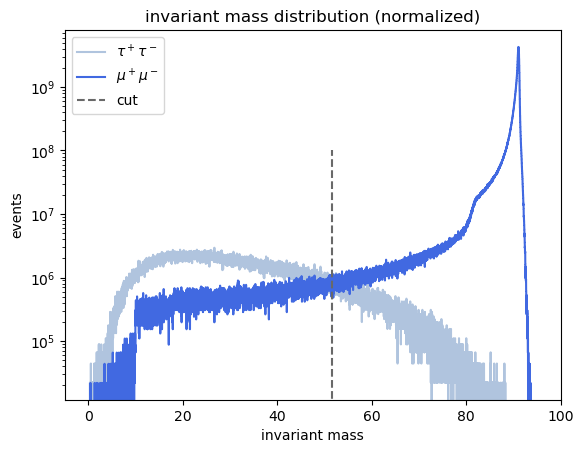

In [81]:
w1 = 1462.08*150000000/10000000
w2 = 1476.58*150000000/10000000

plt.plot(x[:-1],y2*w2, color='lightsteelblue', drawstyle='steps-mid', label="$τ^+τ^-$")
plt.plot(x[:-1],y1*w1, color='royalblue', drawstyle='steps-mid', label="$μ^+μ^-$")

plt.xlim(-5,100)
plt.yscale("log")
plt.plot([51.6525,51.6525],[0,1e8], color = 'dimgrey', linestyle = 'dashed', label = "cut")
plt.title("invariant mass distribution (normalized)")
plt.ylabel("events")
plt.xlabel("invariant mass")
plt.legend()

In [75]:
h_mumu = f['p8_ee_Zmumu_ecm91/m_inv;1'].to_hist()*w1
x = h_mumu.axes[0].centers

h_tautau = f['p8_ee_Ztautau_ecm91/m_inv;1'].to_hist()*w2
x = h_tautau.axes[0].centers

ratio_list = []

for i in x:
    integral = h_mumu[i*1.0j:].sum()
    integral2 = h_tautau[i*1.0j:].sum()
    ratio = integral.value/(np.sqrt(integral.value+integral2.value))
    ratio_list.append(ratio)

/tmp/ipykernel_3415217/353014161.py:12: RuntimeWarning: invalid value encountered in scalar divide
  ratio = integral.value/(np.sqrt(integral.value+integral2.value))


51.652499999999996 446896.0080957046


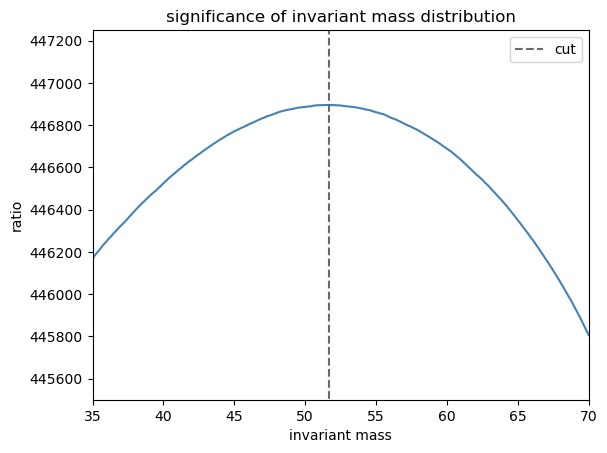

In [77]:
plt.plot(x,ratio_list, color = 'steelblue')
plt.title("significance of invariant mass distribution")
plt.xlabel("invariant mass")
plt.ylabel("ratio")
plt.xlim(35,70)
plt.ylim(445500,447250)
plt.plot([51.6525,51.6525],[0,450000], color = 'dimgrey', linestyle = 'dashed', label = "cut")
plt.legend()

max_y = max(ratio_list)
max_x = x[ratio_list.index(max_y)]
print(max_x, max_y)

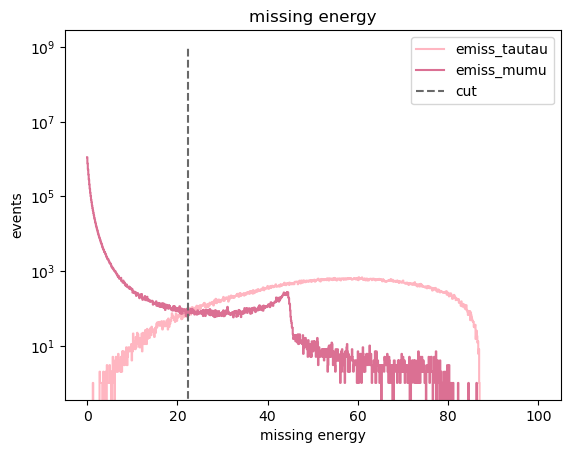

In [82]:
h = f['p8_ee_Zmumu_ecm91/emiss;1']
y3,x = h.to_numpy()

h = f['p8_ee_Ztautau_ecm91/emiss;1']
y4,x = h.to_numpy()

plt.plot(x[:-1],y4, color='lightpink', drawstyle='steps-mid', label="emiss_tautau")
plt.plot(x[:-1],y3, color='palevioletred', drawstyle='steps-mid', label="emiss_mumu")

plt.title("missing energy")
plt.xlabel("missing energy")
plt.ylabel("events")
plt.yscale("log")
plt.plot([22.25,22.25],[0,1e9], color='dimgrey', linestyle='dashed', label = "cut")
plt.legend()

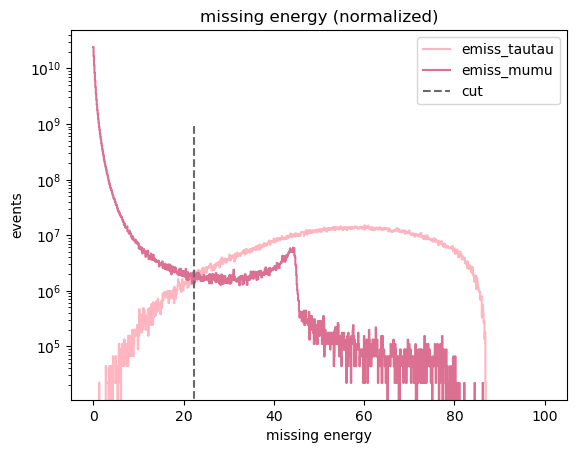

In [83]:
plt.plot(x[:-1],y4*w2, color='lightpink', drawstyle='steps-mid', label="emiss_tautau")
plt.plot(x[:-1],y3*w1, color='palevioletred', drawstyle='steps-mid', label="emiss_mumu")

plt.title("missing energy (normalized)")
plt.xlabel("missing energy")
plt.ylabel("events")
plt.yscale("log")
plt.plot([22.25,22.25],[0,1e9], color='dimgrey', linestyle='dashed', label = "cut")
plt.legend()

In [62]:
h_mumu = f['p8_ee_Zmumu_ecm91/emiss;1'].to_hist()*w1
x = h_mumu.axes[0].centers

h_tautau = f['p8_ee_Ztautau_ecm91/emiss;1'].to_hist()*w2
x = h_tautau.axes[0].centers

s_list = []
b_list = []
ratio_list = []
x_list = []

fractions_list = []
for index, i in enumerate(x):
    
    if index==0: continue
    
    integral = h_mumu[0.0j:i*1.0j].sum()
    integral2 = h_tautau[0.0j:i*1.0j].sum()
    s_list.append(integral)
    b_list.append(integral2)
    ratio = integral.value/(np.sqrt(integral.value+integral2.value))
    ratio_list.append(ratio)
    x_list.append(i)

22.400000000000002 307660.45352106646


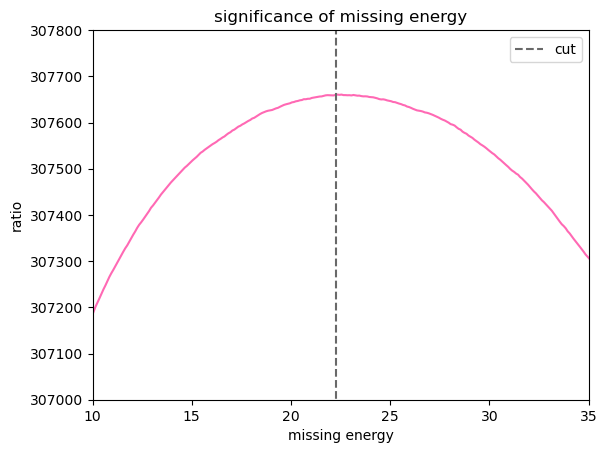

In [73]:
plt.plot(x_list, ratio_list, color = 'hotpink')
plt.title("significance of missing energy")
plt.xlabel("missing energy")
plt.ylabel("ratio")
plt.xlim(10,35)
plt.ylim(307000,307800)
plt.plot([22.25,22.25],[0,310000], color = 'dimgrey', linestyle = 'dashed', label = "cut")
plt.legend()

max_y = max(ratio_list)
max_x = x[ratio_list.index(max_y)]
print(max_x, max_y)